#### Implement the Naive Bayes Classifier on Covid Dataset to predict whether a patient is covid +ve or not.


#### Compute the accuarcy, precision, recall, F1 Score ROC Curve of the classifier, considering 80% of the training data.
Draw the validation curves of the classifier

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

In [2]:
data = pd.read_csv('covid(For Naive Bayes Program).csv')
data


,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,Low,Low,Low,High,Normal,Normal,True
1,2,Low,Low,Normal,High,Normal,High,True
2,3,Low,High,Normal,High,Normal,Normal,False
3,4,Low,High,Normal,High,High,Normal,True
4,5,Low,Normal,High,High,Normal,Normal,False
5,6,Low,Normal,Normal,High,Normal,High,True
6,7,Normal,Low,Low,High,Normal,Normal,True
7,8,Normal,High,Normal,High,Normal,Normal,False
8,9,Normal,High,Normal,High,High,High,True
9,10,Normal,Normal,High,High,Normal,Normal,False


In [3]:
le = preprocessing.LabelEncoder()
pc = le.fit_transform(data['pc'].values)
wbc = le.fit_transform(data['wbc'].values)
mc = le.fit_transform(data['mc'].values)
ast = le.fit_transform(data['ast'].values)
bc = le.fit_transform(data['bc'].values)
ldh = le.fit_transform(data['ldh'].values)
y = le.fit_transform(data['diagnosis'].values)

In [4]:
X = np.array(list(zip(pc, wbc, mc, ast, bc, ldh)))

In [5]:
X

array([[1, 1, 1, 0, 1, 1],
       [1, 1, 2, 0, 1, 0],
       [1, 0, 2, 0, 1, 1],
       [1, 0, 2, 0, 0, 1],
       [1, 2, 0, 0, 1, 1],
       [1, 2, 2, 0, 1, 0],
       [2, 1, 1, 0, 1, 1],
       [2, 0, 2, 0, 1, 1],
       [2, 0, 2, 0, 0, 0],
       [2, 2, 0, 0, 1, 1],
       [2, 2, 0, 0, 1, 0],
       [0, 1, 1, 1, 1, 1],
       [0, 2, 0, 1, 1, 1],
       [0, 2, 0, 1, 0, 0],
       [0, 0, 2, 1, 1, 0],
       [1, 2, 0, 0, 0, 1],
       [2, 2, 0, 0, 0, 1],
       [0, 1, 1, 1, 1, 0],
       [2, 2, 2, 0, 1, 1],
       [2, 0, 2, 0, 1, 0],
       [2, 1, 2, 0, 1, 0],
       [1, 0, 2, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [0, 0, 2, 1, 1, 1],
       [0, 2, 2, 1, 1, 1]])

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)
naivee = MultinomialNB()
naivee.fit(xtrain, ytrain)
ypred = naivee.predict(xtest)


In [7]:
print("Accuracy: ", accuracy_score(ytest, ypred))
print("Classification Report: \n", classification_report(ytest, ypred))

Accuracy:  0.5714285714285714
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.57      1.00      0.73         4

    accuracy                           0.57         7
   macro avg       0.29      0.50      0.36         7
weighted avg       0.33      0.57      0.42         7



D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [8]:
lr_probs = naivee.predict_proba(xtest)

In [9]:
lr_probs

array([[0.43915545, 0.56084455],
       [0.49514566, 0.50485434],
       [0.14150945, 0.85849055],
       [0.35143902, 0.64856098],
       [0.11631098, 0.88368902],
       [0.31462587, 0.68537413],
       [0.13535561, 0.86464439]])

In [10]:
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [11]:
lr_probs

array([0.56084455, 0.50485434, 0.85849055, 0.64856098, 0.88368902,
       0.68537413, 0.86464439])

In [12]:
lr_fpr, lr_tpr, _=roc_curve(ytest, lr_probs)

In [13]:
lr_fpr

array([0.        , 0.33333333, 0.33333333, 1.        , 1.        ])

In [14]:
lr_tpr

array([0.  , 0.  , 0.75, 0.75, 1.  ])

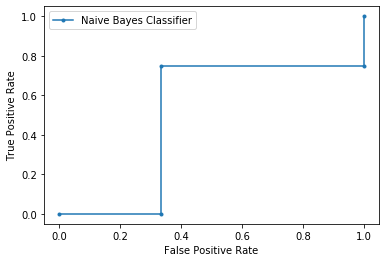

In [16]:
from matplotlib import pyplot
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes Classifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()